In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=0628d00d7b1a132faf9b97ccbdedbb422340c6184f2d7406a522b3754a4bc4aa
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
print(dataset.head())
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

   CustomerID  A1     A2     A3  A4  A5  ...  A10  A11  A12  A13   A14  Class
0    15776156   1  22.08  11.46   2   4  ...    0    1    2  100  1213      0
1    15739548   0  22.67   7.00   2   8  ...    0    0    2  160     1      0
2    15662854   0  29.58   1.75   1   4  ...    0    1    2  280     1      0
3    15687688   0  21.67  11.50   1   5  ...   11    1    2    0     1      1
4    15715750   1  20.17   8.17   2   6  ...   14    0    2   60   159      1

[5 rows x 16 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [ ]:
print(X.shape)
X

(690, 15)


array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.05)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 200)

In [ ]:
som.distance_map()[0][3]

0.5773222540305397

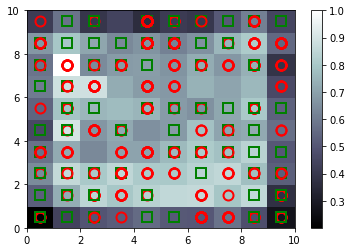

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) # returns mean of the neuron distance for winning nodes
colorbar() # adds legend
markers = ['o', 's'] # red o is cust who didn't get approval, s is square, who got approval
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]], # if cust didn't get approval y[i] = 0, this marker[0] = red circle 
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)
print(len(mappings[(6,1)]))
print('and')
print(len(mappings[(4,1)]))

6
and
5


In [ ]:
frauds = np.concatenate((mappings[(6,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15815271
15744273
15570990
15789865
15618703
15810716
15684722
15623369
15650591
15633608
15675450


# Recommendation

In [ ]:
!wget "http://files.grouplens.org/datasets/movielens/ml-1m.zip"
!unzip ml-1m.zip
!ls

--2020-09-15 12:37:46--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  18.8MB/s    in 0.3s    

2020-09-15 12:37:46 (18.8 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         
ml-1m  ml-1m.zip  sample_data


In [ ]:
!wget "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
!unzip ml-100k.zip
!ls

--2020-09-15 12:37:47--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  16.3MB/s    in 0.3s    

2020-09-15 12:37:47 (16.3 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

# We won't be using this dataset.
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')

print(movies.head())
print('Users \n')
print(users.head())
print('Ratings \n')
print(ratings.head())

   0                                   1                             2
0  1                    Toy Story (1995)   Animation|Children's|Comedy
1  2                      Jumanji (1995)  Adventure|Children's|Fantasy
2  3             Grumpier Old Men (1995)                Comedy|Romance
3  4            Waiting to Exhale (1995)                  Comedy|Drama
4  5  Father of the Bride Part II (1995)                        Comedy
Users 

   0  1   2   3      4
0  1  F   1  10  48067
1  2  M  56  16  70072
2  3  M  25  15  55117
3  4  M  45   7  02460
4  5  M  25  20  55455
Ratings 

   0     1  2          3
0  1  1193  5  978300760
1  1   661  3  978302109
2  1   914  3  978301968
3  1  3408  4  978300275
4  1  2355  5  978824291


In [ ]:
ratings

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
training_set = pd.read_csv('ml-100k/u1.base', delimiter = '\t')
training_set = np.array(training_set, dtype = 'int')
test_set = pd.read_csv('ml-100k/u1.test', delimiter = '\t')
test_set = np.array(test_set, dtype = 'int')

In [ ]:
training_set[:10]
#user movie rating timestamp

array([[        1,         2,         3, 876893171],
       [        1,         3,         4, 878542960],
       [        1,         4,         3, 876893119],
       [        1,         5,         3, 889751712],
       [        1,         7,         4, 875071561],
       [        1,         8,         1, 875072484],
       [        1,         9,         5, 878543541],
       [        1,        11,         2, 875072262],
       [        1,        13,         5, 875071805],
       [        1,        15,         5, 875071608]])

In [ ]:
nb_users = int(max(max(training_set[:, 0], ), max(test_set[:, 0])))
nb_movies = int(max(max(training_set[:, 1], ), max(test_set[:, 1])))
nb_users,nb_movies

(943, 1682)

In [ ]:
ratings = np.zeros(nb_movies)
ratings[training_set[:,1][training_set[:,0]==1]] = training_set[:,2][training_set[:,0]==1]

SyntaxError: ignored

In [ ]:
ratings

array([0., 0., 3., ..., 0., 0., 0.])

In [ ]:
# we want users in row, and movies in columns
def convert(data):
  new_data = []
  for i in range(1,nb_users+1):
    id_movies = data[:,1][data[:,0]==i]
    id_ratings = data[:,2][data[:,0]==i]
    ratings = np.zeros(nb_movies)
    ratings[id_movies-1] = id_ratings
    new_data.append([ratings])
  return new_data
  
training_set = convert(training_set)
test_set = convert(test_set)
print(training_set[:10])
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

[[array([0., 3., 4., ..., 0., 0., 0.])], [array([4., 0., 0., ..., 0., 0., 0.])], [array([0., 0., 0., ..., 0., 0., 0.])], [array([0., 0., 0., ..., 0., 0., 0.])], [array([0., 0., 0., ..., 0., 0., 0.])], [array([4., 0., 0., ..., 0., 0., 0.])], [array([0., 0., 0., ..., 0., 0., 0.])], [array([0., 0., 0., ..., 0., 0., 0.])], [array([0., 0., 0., ..., 0., 0., 0.])], [array([0., 0., 0., ..., 0., 0., 0.])]]


In [ ]:
print(training_set[:10])

tensor([[[0., 3., 4.,  ..., 0., 0., 0.]],

        [[4., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])


In [ ]:
training_set[training_set == 0] = -1
training_set[training_set == 1] = 0
training_set[training_set == 2] = 0
training_set[training_set >= 3] = 1

test_set[test_set == 0] = -1
test_set[test_set == 1] = 0
test_set[test_set == 2] = 0
test_set[test_set >= 3] = 1

In [ ]:
print(training_set[:10])

tensor([[[-1.,  1.,  1.,  ..., -1., -1., -1.]],

        [[ 1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        ...,

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]]])


In [ ]:
class RBM():
  def __init__(self, nv, nh):
    self.W = torch.tensor((nh, nv))
    self.a = torch.tensor((1, nh))
    self.b = torch.tensor((1, nv))
  def sample_h(self, x):
    wx = torch.mm(x, self.W.t())
    activation = wx + self.a.expand_as(wx)
    p_h_given_v = torch.sigmoid(activation)
    return p_h_given_v, torch.bernoulli(p_h_given_v)
  def sample_v(self, y):
    wy = torch.mm(y, self.W)
    activation = wy + self.b.expand_as(wy)
    p_v_given_h = torch.sigmoid(activation)
    return p_v_given_h, torch.bernoulli(p_v_given_h)
  def train(self, v0, vk, ph0, phk):
    self.W += (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
    self.b += torch.sum((v0 - vk), 0)
    self.a += torch.sum((ph0 - phk), 0)
nv = len(training_set[0])
nh = 100
batch_size = 100
rbm = RBM(nv, nh)

In [ ]:
nb_epoch = 10
for epoch in range(1, nb_epoch + 1):
  train_loss = 0
  s = 0.
  for id_user in range(0, nb_users - batch_size, batch_size):
    vk = training_set[id_user : id_user + batch_size]
    v0 = training_set[id_user : id_user + batch_size]
    ph0,_ = rbm.sample_h(v0)
    for k in range(10):
      _,hk = rbm.sample_h(vk)
      _,vk = rbm.sample_v(hk)
      vk[v0<0] = v0[v0<0]
    phk,_ = rbm.sample_h(vk)
    rbm.train(v0, vk, ph0, phk)
    train_loss += torch.mean(torch.abs(v0[v0 >= 0] - vk[v0 >= 0]))
    s += 1.
  print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))


IndexError: ignored